<a href="https://colab.research.google.com/github/janani-1408/ml_projects/blob/main/ML_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**WAITER-TIP-PREDCITION**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

**Extracting the dataset into dataframe**

In [ ]:
dataset=pd.read_csv('/content/tips.csv')

**Data analysis**

In [ ]:
dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
dataset.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [ ]:
dataset.shape

(244, 7)

In [ ]:
dataset.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [ ]:
dataset.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Analysing the data

<ipython-input-9-f0eed88568f6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['total_bill'])


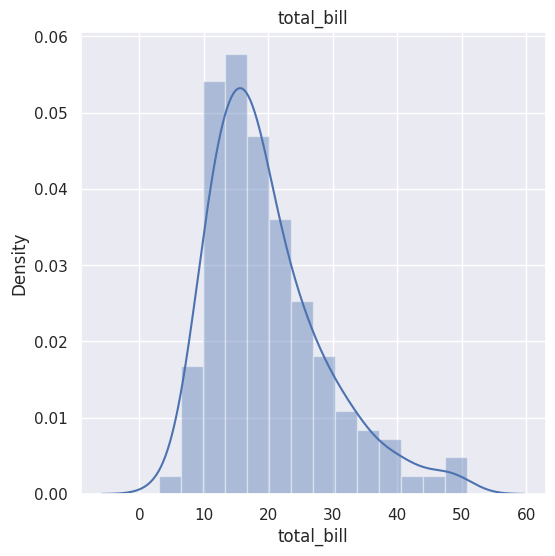

In [ ]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(dataset['total_bill'])
plt.title("total_bill")
plt.show()

<ipython-input-10-56e0aebc44b2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['tip'])


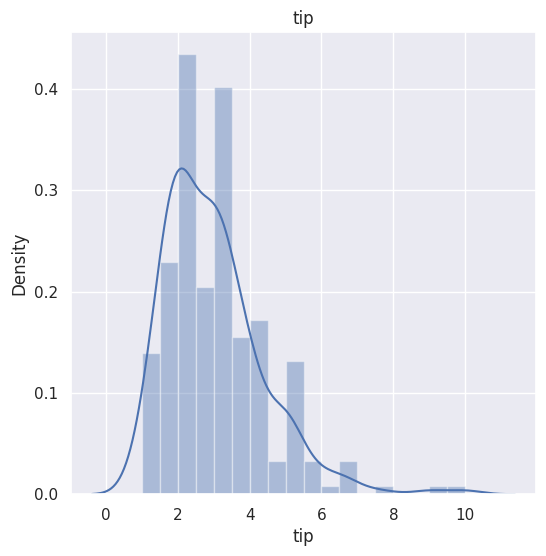

In [ ]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(dataset['tip'])
plt.title("tip")
plt.show()

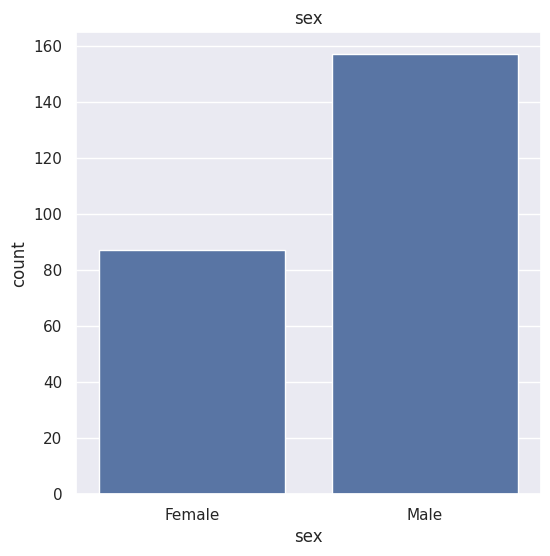

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=dataset)
plt.title("sex")
plt.show()

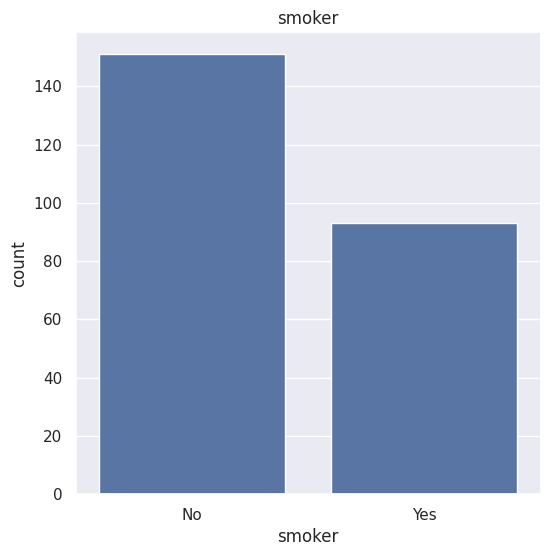

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=dataset)
plt.title("smoker")
plt.show()

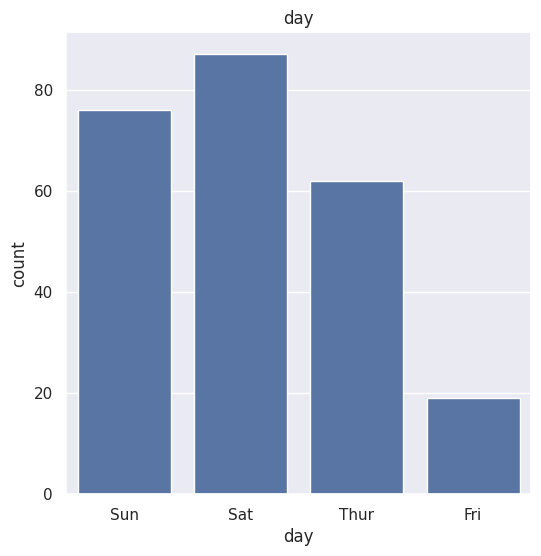

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='day',data=dataset)
plt.title("day")
plt.show()

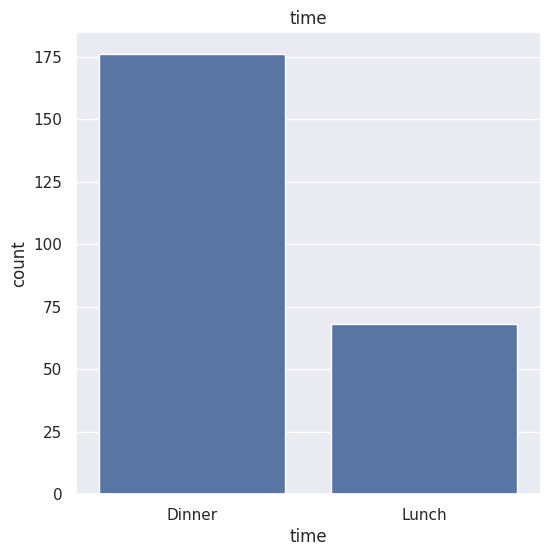

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='time',data=dataset)
plt.title("time")
plt.show()

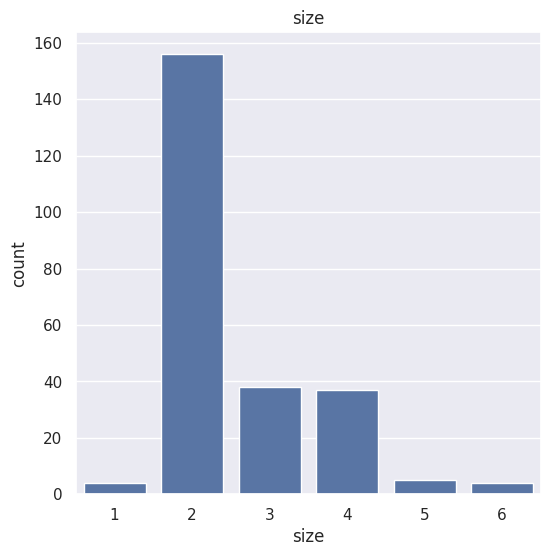

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='size',data=dataset)
plt.title("size")
plt.show()

data preprocessing

In [ ]:
dataset.replace({'sex':{'Male':0,'Female':1}},inplace=True)

dataset.replace({'smoker':{'No':0,'Yes':1}},inplace=True)

dataset.replace({'day':{'Sun':0,'Sat':1,'Thur':2, 'Fri':3}},inplace=True)

dataset.replace({'time':{'Lunch':0,'Dinner':1}},inplace=True)

In [ ]:
dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,0,0,1,2
1,10.34,1.66,0,0,0,1,3
2,21.01,3.50,0,0,0,1,3
3,23.68,3.31,0,0,0,1,2
4,24.59,3.61,1,0,0,1,4


In [ ]:
x = dataset.drop(columns ='tip',axis=1)
y = dataset['tip']

In [ ]:
x

,total_bill,sex,smoker,day,time,size
0,16.99,1,0,0,1,2
1,10.34,0,0,0,1,3
2,21.01,0,0,0,1,3
3,23.68,0,0,0,1,2
4,24.59,1,0,0,1,4
...,...,...,...,...,...,...
239,29.03,0,0,1,1,3
240,27.18,1,1,1,1,2
241,22.67,0,1,1,1,2
242,17.82,0,0,1,1,2


In [ ]:
y

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,total_bill,sex,smoker,day,time,size
228,13.28,0,0,1,1,2
208,24.27,0,1,1,1,2
96,27.28,0,1,3,1,2
167,31.71,0,0,0,1,4
84,15.98,0,0,2,0,2
...,...,...,...,...,...,...
106,20.49,0,1,1,1,2
14,14.83,1,0,0,1,2
92,5.75,1,1,3,1,2
179,34.63,0,1,0,1,2


In [ ]:
X_test

,total_bill,sex,smoker,day,time,size
24,19.82,0,0,1,1,2
6,8.77,0,0,0,1,2
153,24.55,0,0,0,1,4
211,25.89,0,1,1,1,4
198,13.00,1,1,2,0,2
176,17.89,0,1,0,1,2
192,28.44,0,1,2,0,2
124,12.48,1,0,2,0,2
9,14.78,0,0,0,1,2
101,15.38,1,1,3,1,2


In [ ]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
train_pred=model.predict(X_train)

In [ ]:
r2_train = metrics.r2_score(Y_train, train_pred)
print("R squared value:",r2_train)

R squared value: 0.4559135521282882


In [ ]:
test_pred=model.predict(X_test)

In [ ]:
r2_test = metrics.r2_score(Y_test, test_pred)
print("R squared value:",r2_test)

R squared value: 0.44417104879050395


In [ ]:
import numpy as np

# Get user input for each feature
total_bill = float(input("Enter total bill amount: "))
size = int(input("Enter the family size: "))
sex_male = int(input("Enter the gender of the person: (1 for Yes, 0 for No): "))
smoker_yes = int(input("Did the person include smokers? (1 for Yes, 0 for No): "))
day_sat = int(input("Enter the day (0 for sunday ,1 for saturday,2 for thursday,3 for friday1)"))
time_dinner = int(input("Is it dinner time? (1 for Yes, 0 for No): "))

# Create input data tuple
input_data = (total_bill, size, sex_male, smoker_yes, day_sat, time_dinner)

# Convert tuple to numpy array
input_data_as_np_array = np.asarray(input_data)

# Reshape the array
input_reshape = input_data_as_np_array.reshape(1, -1)



Enter total bill amount: 16.99
Enter the family size: 2
Is the payer male? (1 for Yes, 0 for No): 0
Did the party include smokers? (1 for Yes, 0 for No): 0
Enter the day (0 for sunday ,1 for saturday,2 for thursday,3 for friday1)0
Is it dinner time? (1 for Yes, 0 for No): 1

Original Input Data:
(16.99, 2, 0, 0, 0, 1)

Reshaped Input Data (as numpy array):
[[16.99  2.    0.    0.    0.    1.  ]]


In [ ]:
prediction = model.predict(input_reshape)
print("Predicted value for the input(",input_data,"):",prediction[0])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
